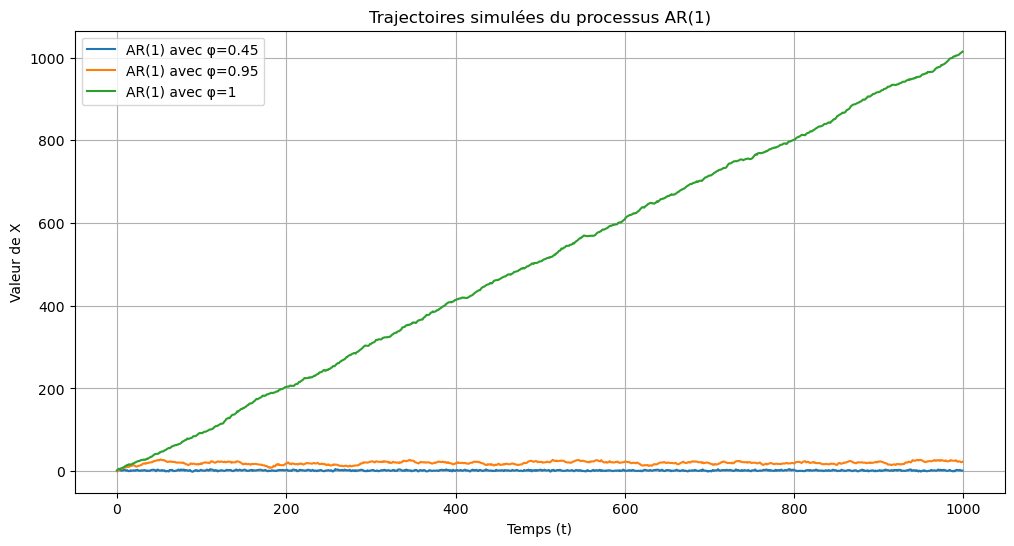

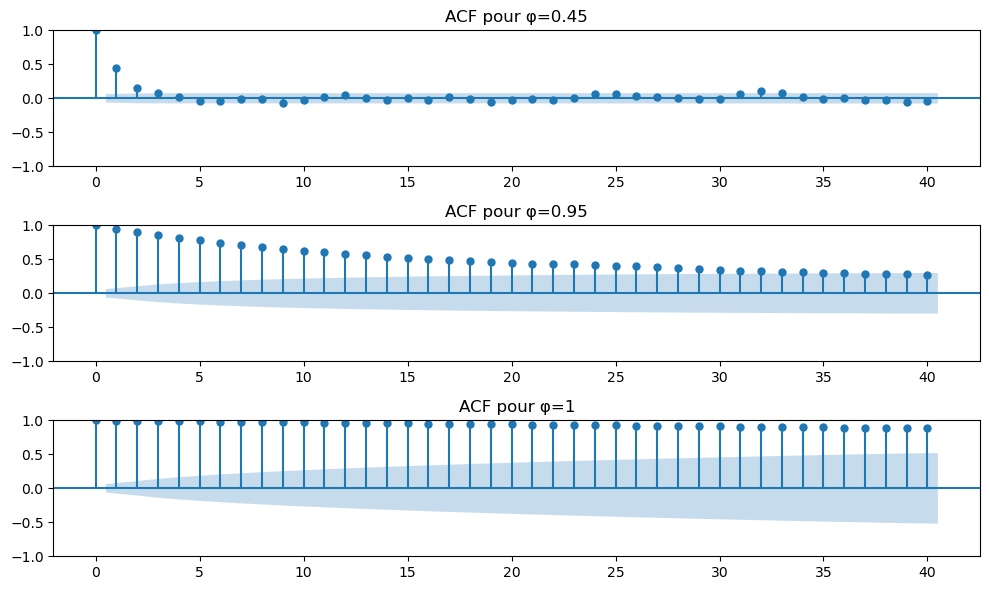

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Définition des paramètres
N = 1000  # Taille de la trajectoire
mu = 1
sigma2 = 1  # Variance du bruit blanc
sigma = np.sqrt(sigma2)  # Écart-type
phis = [0.45, 0.95, 1]  # Valeurs de phi

# Simulation du processus AR(1)
def simulate_ar1(phi, N, mu, sigma):
    X = np.zeros(N)
    epsilon = np.random.normal(0, sigma, N)
    X[0] = mu + epsilon[0]
    for t in range(1, N):
        X[t] = mu + phi * X[t-1] + epsilon[t]
    return X

# Tracé des trajectoires pour chaque valeur de phi
plt.figure(figsize=(12, 6))
for phi in phis:
    X = simulate_ar1(phi, N, mu, sigma)
    plt.plot(X, label=f'AR(1) avec φ={phi}')
plt.xlabel('Temps (t)')
plt.ylabel('Valeur de X')
plt.title('Trajectoires simulées du processus AR(1)')
plt.legend()
plt.grid()
plt.show()

# Tracé de la fonction d'autocorrélation (ACF) pour chaque phi
fig, axes = plt.subplots(len(phis), 1, figsize=(10, 6))
for i, phi in enumerate(phis):
    X = simulate_ar1(phi, N, mu, sigma)
    sm.graphics.tsa.plot_acf(X, lags=40, ax=axes[i])
    axes[i].set_title(f'ACF pour φ={phi}')
plt.tight_layout()
plt.show()

# Vérification de la stationnarité
# Le processus est stationnaire si |φ| < 1
